In [38]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")

from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, \
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

In [39]:
base_sim_folders = """base.1589909241.52
base.1589909289.99
base.1589909332.86
base.1589909366.63
base.1589909405.06
base.1589909444.0
base.1589909492.19""".split('\n')

fall_sim_folders = """fall.1589909226.34
fall.1589909278.8
fall.1589909320.01
fall.1589909354.49
fall.1589909391.02
fall.1589909428.78
fall.1589909473.09""".split('\n')

fall_sim_dfs = []
base_sim_dfs = []
for folder in fall_sim_folders:
    fall_sim_dfs.append(load_sim_dir("/nfs01/covid_sims/" + folder))
for folder in base_sim_folders:
    base_sim_dfs.append(load_sim_dir("/nfs01/covid_sims/" + folder))

done loading contact_tracing_delay.0
done loading contact_tracing_delay.1
done loading contact_tracing_delay.2
done loading contact_tracing_delay.3
done loading contact_tracing_delay.4
done loading contact_tracing_delay.5
done loading contact_tracing_delay.6
done loading contact_tracing_delay.7
done loading expected_contacts_per_day.7
done loading expected_contacts_per_day.8
done loading expected_contacts_per_day.9
done loading expected_contacts_per_day.10
done loading expected_contacts_per_day.11
done loading expected_contacts_per_day.12
done loading expected_contacts_per_day.13
done loading expected_contacts_per_day.14
done loading expected_contacts_per_day.15
done loading expected_contacts_per_day.16
done loading expected_contacts_per_day.17
done loading expected_contacts_per_day.18
done loading expected_contacts_per_day.19
done loading expected_contacts_per_day.20
done loading expected_contacts_per_day.30
done loading expected_contacts_per_day.40
done loading expected_contacts_per_

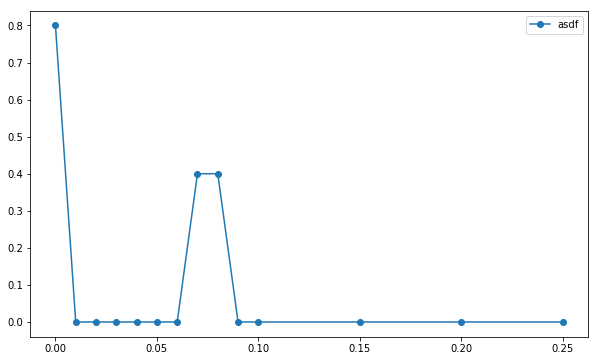

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_many_dfs(sim_output_dict, yaxisfn, ylabel="", xlabel="", title="", figsize=(10,6)):
    plt.figure(figsize=figsize)
    for sim_label, sim_output in sim_output_dict.items():
        xs = []
        ys = []
        for sim_parameter_name, dfs in sim_output.items():
            # compute x-value assuming that sim_param_name is of form 'varied_param_name.value'
            param_val = float('.'.join(sim_parameter_name.split('.')[1:]))
            xs.append(param_val)
            # yaxisfn is a function that takes in a list of trajectory dataframes and
            # produces an output metric
            ys.append(yaxisfn(dfs))
        plt.plot(xs, ys, marker='o', label=sim_label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

    
def fraction_exceed_threshold(dfs):
    cips = extract_cips(dfs)
    cip_exceed_thresh = [cip for cip in cips if cip >= 0.1]
    return len(cip_exceed_thresh) / len(cips) * 100

plot_many_dfs({'asdf': sim_dfs}, fraction_exceed_threshold)

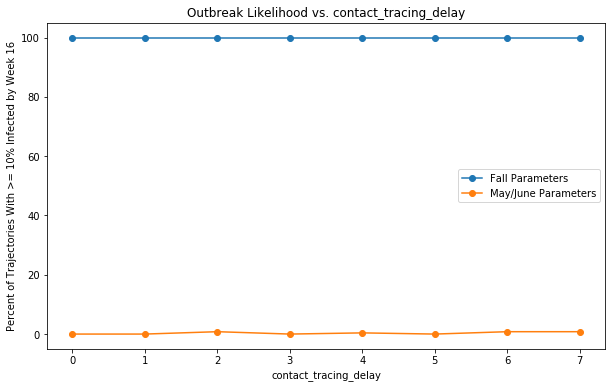

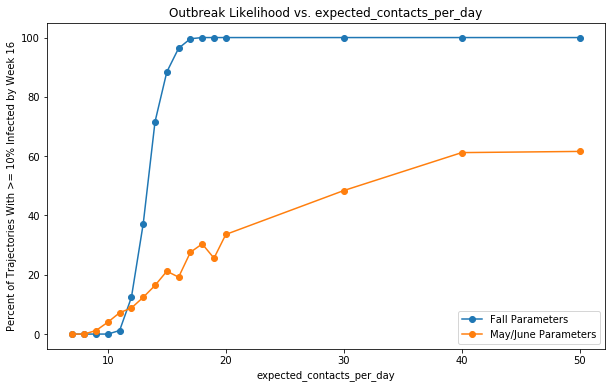

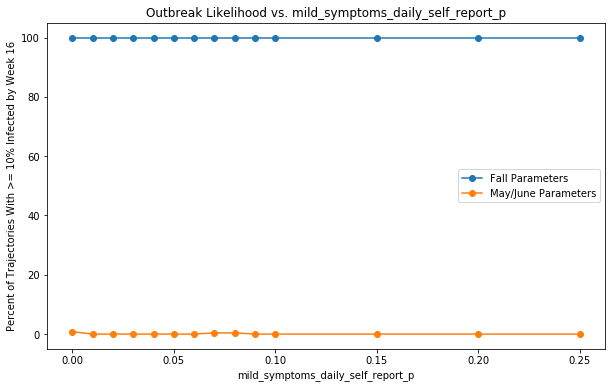

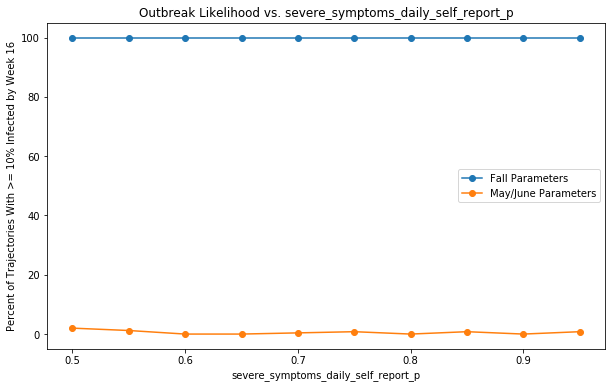

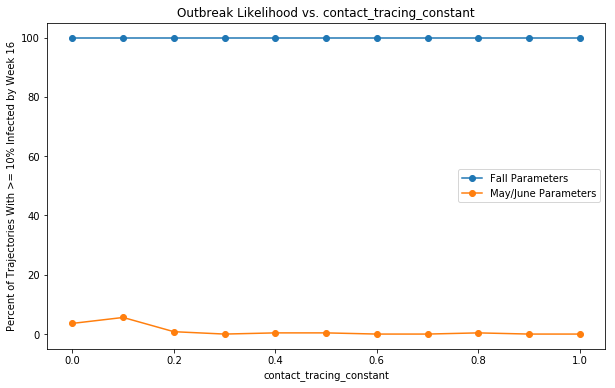

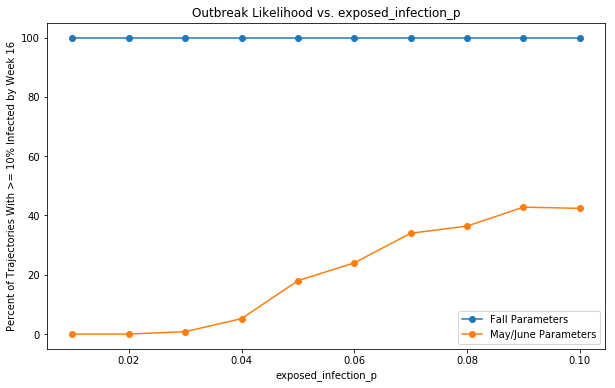

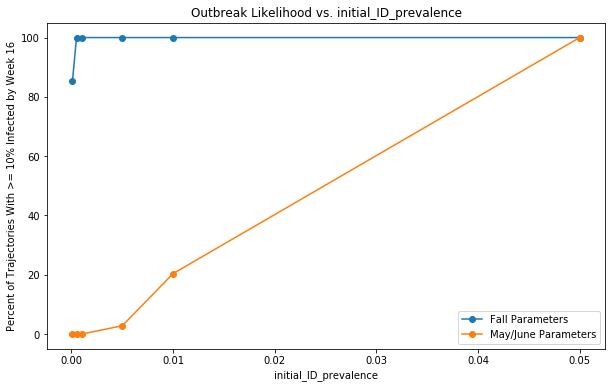

In [40]:
sim_names = ['contact_tracing_delay', 
             'expected_contacts_per_day', 
             'mild_symptoms_daily_self_report_p', 
             'severe_symptoms_daily_self_report_p', 
             'contact_tracing_constant', 
             'exposed_infection_p', 
             'initial_ID_prevalence']
for fall_dfs, base_dfs, sim_name in zip(fall_sim_dfs, base_sim_dfs, sim_names):
    plot_many_dfs({'Fall Parameters': fall_dfs, 'May/June Parameters': base_dfs}, fraction_exceed_threshold,
                 xlabel=sim_name, ylabel="Percent of Trajectories With >= 10% Infected by Week 16",
                 title="Outbreak Likelihood vs. {}".format(sim_name))

# plot second round of sensitivity sims

In [41]:
sim_folders = """contact_delay_base.1589922053.45
contact_delay_fall.1589922064.31
contact_recall_base.1589922201.67
contact_recall_fall.1589922186.75
daily_contacts_base.1589922084.37
daily_contacts_fall.1589922095.92
exposed_infection_p_base.1589922237.62
exposed_infection_p_fall.1589922222.97
mild_self_reporting_base.1589922112.84
mild_self_reporting_fall.1589922124.02
prevalence_base.1589922256.2
prevalence_fall.1589922271.46
severe_self_reporting_base.1589922146.24
severe_self_reporting_fall.1589922161.84
""".split('\n')
fall_sim_results = {}
base_sim_results = {}

unallocated_results = []

for folder in sim_folders:
    sims_in_dir = load_sim_dir("/nfs01/covid_sims/" + folder)
    if '_base' in folder:
        param_name = folder.split('_base')[0]
        base_sim_results[param_name] = sims_in_dir
    elif '_fall' in folder:
        param_name = folder.split('_fall')[0]
        fall_sim_results[param_name] = sims_in_dir
    else:
        print("couldn't determinie fall or base")
        unallocated_results.append(sims_in_dir)

done loading contact_tracing_delay.0
done loading contact_tracing_delay.1
done loading contact_tracing_delay.2
done loading contact_tracing_delay.3
done loading contact_tracing_delay.4
done loading contact_tracing_delay.5
done loading contact_tracing_delay.6
done loading contact_tracing_delay.7
done loading contact_tracing_delay.0
done loading contact_tracing_delay.1
done loading contact_tracing_delay.2
done loading contact_tracing_delay.3
done loading contact_tracing_delay.4
done loading contact_tracing_delay.5
done loading contact_tracing_delay.6
done loading contact_tracing_delay.7
done loading contact_tracing_constant.0.0
done loading contact_tracing_constant.0.1
done loading contact_tracing_constant.0.2
done loading contact_tracing_constant.0.3
done loading contact_tracing_constant.0.4
done loading contact_tracing_constant.0.5
done loading contact_tracing_constant.0.6
done loading contact_tracing_constant.0.7
done loading contact_tracing_constant.0.8
done loading contact_tracing_c

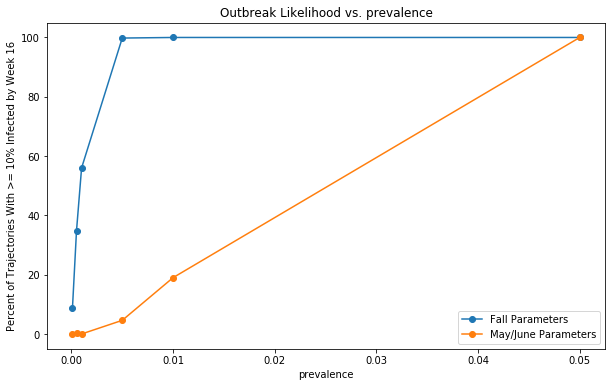

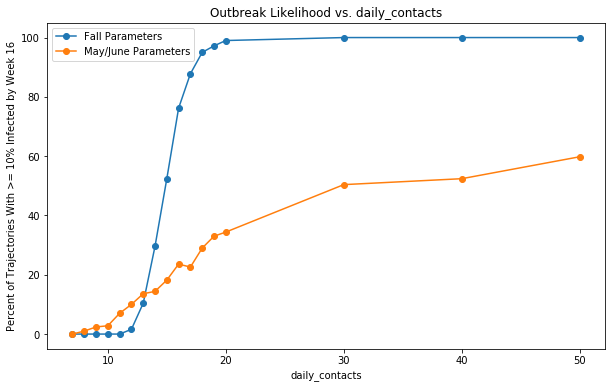

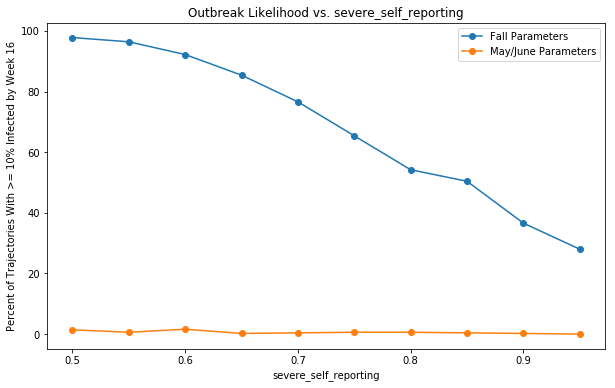

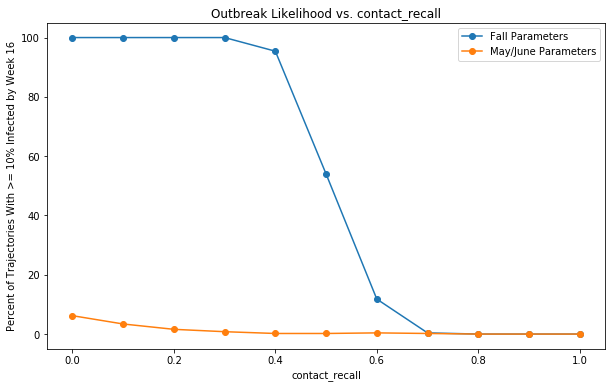

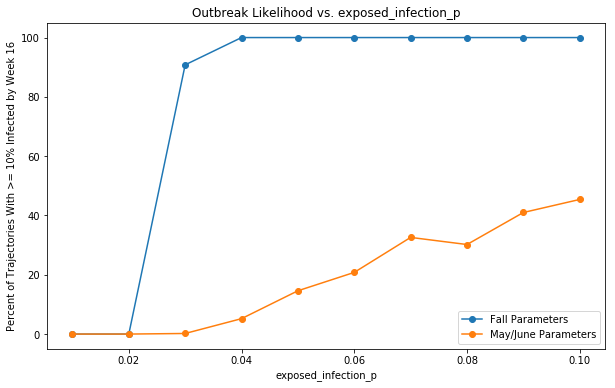

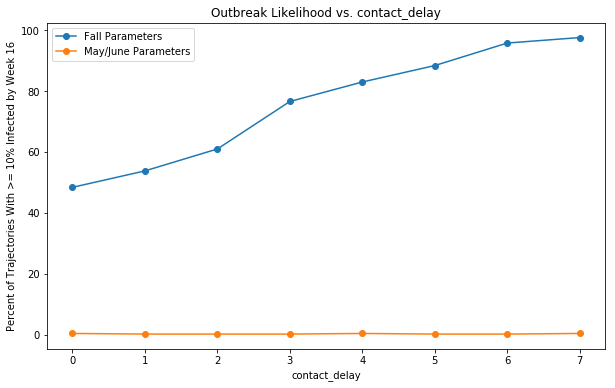

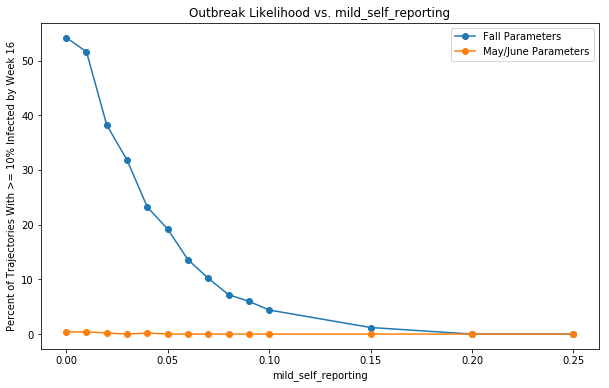

In [42]:
sim_names = set(fall_sim_results.keys())
for sim_name in sim_names:
    fall_dfs = fall_sim_results[sim_name]
    base_dfs = base_sim_results[sim_name]
    plot_many_dfs({'Fall Parameters': fall_dfs, 'May/June Parameters': base_dfs}, fraction_exceed_threshold,
                 xlabel=sim_name, ylabel="Percent of Trajectories With >= 10% Infected by Week 16",
                 title="Outbreak Likelihood vs. {}".format(sim_name))